In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline
plt.rcParams["figure.dpi"]=300
plt.rcParams["figure.facecolor"]="white"

plt.rcParams.update(rcParamsDefault)
large = 22; med = 14; small = 10
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 4,
      'ytick.major.size': 4,
      'xtick.major.width': 0.5,
      'ytick.major.width': 0.5,
      'xtick.minor.size': 4,
      'xtick.minor.width': 0.5,
      'ytick.minor.size': 4,
      'ytick.minor.width': 0.5,
      'axes.linewidth': 0.75,
      'xtick.direction' : 'in', 
      'ytick.direction' : 'out', 
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
         }
plt.rcParams.update(params)

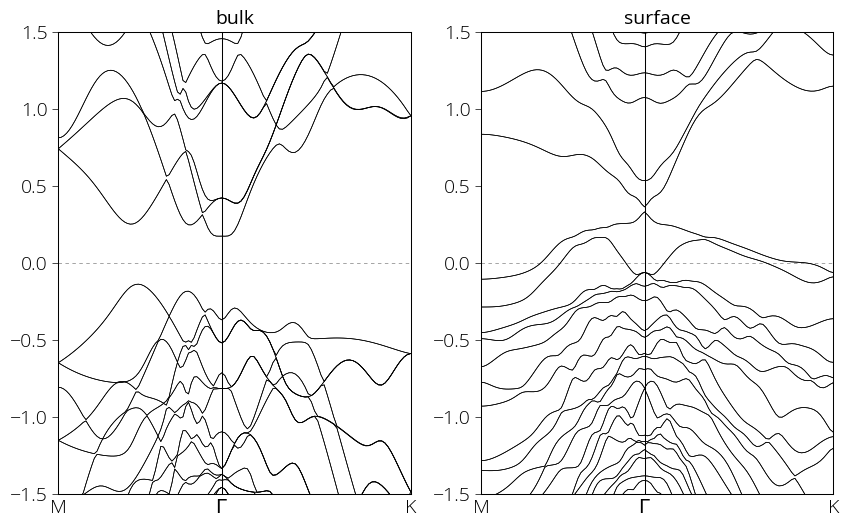

In [2]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
data = np.loadtxt('../Bi2Se3/bi2se3.BANDDAT1')

bndstart = np.where(data[:, 0] == 0.0)[0][0]
databnd = data[bndstart:-1, :]
symlines = data[0:bndstart, 0]
symlines = np.unique(symlines)
bnd = []

for row in range(len(databnd)-1):
    if (np.array_equal(databnd[row, :], databnd[row+1, :]) == False):
        bnd.append(databnd[row, :])
bnd.append(databnd[-2, :])
bnd.append(databnd[-1, :])
bnd = np.array(bnd)

k = np.unique(bnd[:, 0])  # k values 
nbnd = int(len(bnd)/len(k))  # no of bands

bands = np.zeros([len(k), nbnd])

for i in range(len(bnd)):
    k_index = i % len(k)
    band_index = int(i/len(k))
    bands[k_index, band_index] = bnd[i][1]

for i in range(nbnd):
    plt.plot(k, bands[:, i], linewidth=0.5, alpha=1, color='k')

for i in symlines:
    plt.axvline(x=i, linewidth=0.75, color='k', alpha=1)
plt.xlim(k[0], k[-1])
plt.ylim(-1.5, 1.5)
plt.xticks(ticks= [k[0], symlines[0], k[-1]], labels=['M', '$\Gamma$', 'K'])
plt.title("bulk")
plt.axhline(linewidth=0.5, color='k', alpha=0.5, linestyle=(0, (5, 5)))

data = np.loadtxt('../Bi2Se3/bi2se3-slab.BANDDAT1')

bndstart = np.where(data[:, 0] == 0.0)[0][0]
databnd = data[bndstart:-1, :]
symlines = data[0:bndstart, 0]
symlines = np.unique(symlines)
bnd = []

for row in range(len(databnd)-1):
    if (np.array_equal(databnd[row, :], databnd[row+1, :]) == False):
        bnd.append(databnd[row, :])
bnd.append(databnd[-2, :])
bnd.append(databnd[-1, :])
bnd = np.array(bnd)

k = np.unique(bnd[:, 0])  # k values 
nbnd = int(len(bnd)/len(k))  # no of bands

bands = np.zeros([len(k), nbnd])

for i in range(len(bnd)):
    k_index = i % len(k)
    band_index = int(i/len(k))
    bands[k_index, band_index] = bnd[i][1]
plt.subplot(122)
for i in range(nbnd):
    plt.plot(k, bands[:, i], linewidth=0.5, alpha=1, color='k')

for i in symlines:
    plt.axvline(x=i, linewidth=0.75, color='k', alpha=1)
plt.xlim(k[0], k[-1])
plt.axhline(linewidth=0.5, color='k', alpha=0.5, linestyle=(0, (5, 5)))
plt.ylim(-1.5, 1.5)
plt.xticks(ticks= [k[0], symlines[0], k[-1]], labels=['M', '$\Gamma$', 'K'])
plt.title("surface")
plt.show()